In [1]:
from scipy import stats
import time
import requests
import numpy as np
import threading
from scipy.interpolate import interp1d
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict, LeaveOneOut, RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector, RFE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


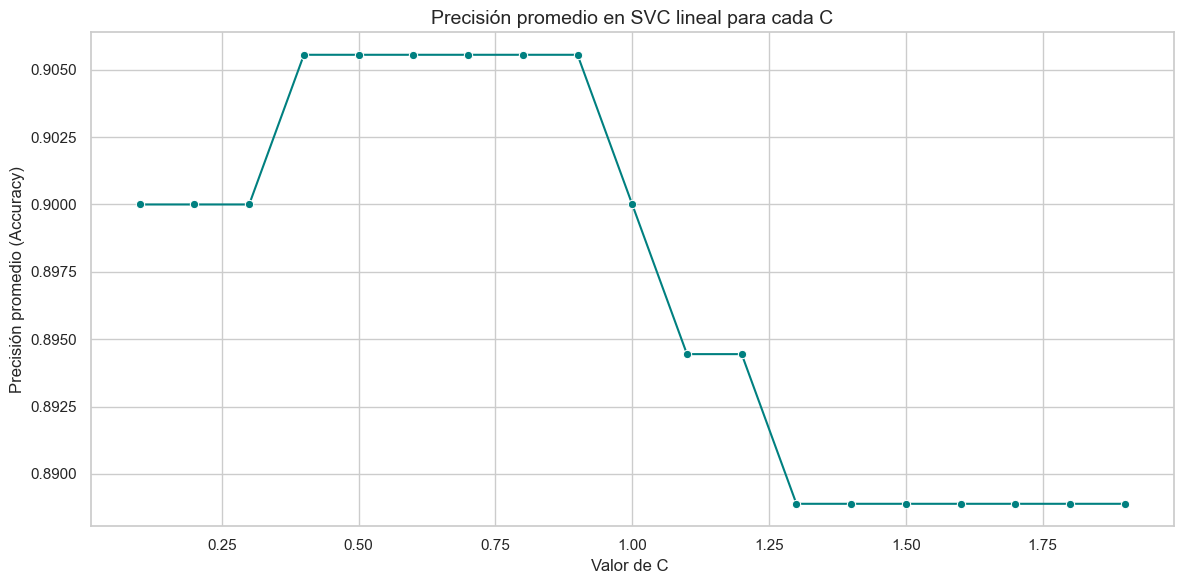

In [2]:
########### Optimizacion de hiperparametros #########

# --------------- SVM lineal con hiperparametro C
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

data=np.loadtxt("../Class Scripts/activity_data.txt")
x=data[:,1:]
y=data[:,0]
x.shape
kf1 = StratifiedKFold(n_splits=5, shuffle = True,random_state=45)


best_c = 1
best_acc = 0
Mean_test_score=[]
for c in  np.arange(1e-1,2, 1e-1):
    acc_hyp_cv = []
    clf_cv_hyp = SVC(C=c,kernel='linear')
 

    for train_index, test_index in kf1.split(x, y):
        x_train = x[train_index, :]
        y_train = y[train_index]
        x_test = x[test_index, :]
        y_test = y[test_index]
        clf_cv_hyp.fit(x_train,y_train)
        y_pred = clf_cv_hyp.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_hyp_cv.append(acc_i)
    
    acc_hyp = np.average(acc_hyp_cv)
    
    if (best_acc < acc_hyp):
        best_c = c
        best_acc = acc_hyp
    
    Mean_test_score.append( acc_hyp)

# Valores de C usados
k_values = np.arange(1e-1, 2, 1e-1)
accuracies = Mean_test_score

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Gráfica
sns.lineplot(x=k_values, y=accuracies, marker='o', color='teal')
 # Escala logarítmica en X



# Etiquetas y diseño
plt.title('Precisión promedio en SVC lineal para cada C', fontsize=14)
plt.xlabel('Valor de C ', fontsize=12)
plt.ylabel('Precisión promedio (Accuracy)', fontsize=12)
plt.tight_layout()
plt.show()

---- n features = 1
ACC: 0.6555555555555556
---- n features = 2
ACC: 0.888888888888889
---- n features = 3
ACC: 0.9333333333333333
---- n features = 4
ACC: 0.9111111111111111
---- n features = 5
ACC: 0.9222222222222222
---- n features = 6
ACC: 0.9111111111111111
---- n features = 7
ACC: 0.9111111111111111
---- n features = 8
ACC: 0.9111111111111111
---- n features = 9
ACC: 0.9111111111111111
---- n features = 10
ACC: 0.8944444444444445
---- n features = 11
ACC: 0.9
---- n features = 12
ACC: 0.888888888888889
---- n features = 13
ACC: 0.8833333333333334
---- n features = 14
ACC: 0.8777777777777779
---- n features = 15
ACC: 0.9111111111111111
---- n features = 16
ACC: 0.9222222222222223
---- n features = 17
ACC: 0.9277777777777778
---- n features = 18
ACC: 0.9222222222222222
---- n features = 19
ACC: 0.9388888888888889
---- n features = 20
ACC: 0.9444444444444444
---- n features = 21
ACC: 0.9444444444444444
---- n features = 22
ACC: 0.9277777777777777
---- n features = 23
ACC: 0.92777777

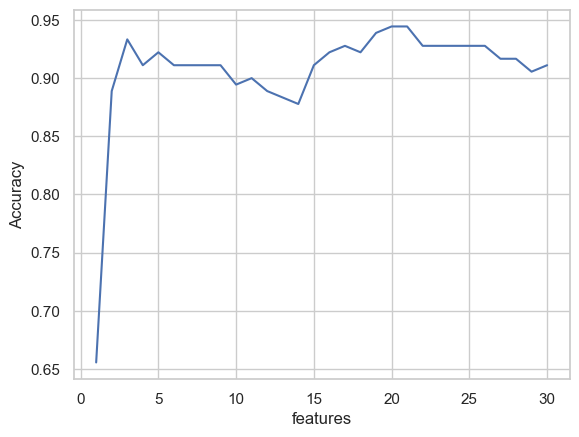

Selected features:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14' 'x15' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21' 'x22' 'x23' 'x24' 'x25'
 'x26' 'x27' 'x28' 'x29']


In [3]:
##### Opt features SVM Lineal
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector, RFE
n_feats = np.arange(1,31,1)
acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True,random_state=42)
    
    for train_idx, test_idx in kf.split(x,y):
        x_train = x[train_idx,:]
        y_train = y[train_idx]
        
        clf_cv = SVC(kernel='linear')
        
        fselection_cv = SelectKBest(f_classif,k=n_feat)
        fselection_cv.fit(x_train,y_train)
        x_train = fselection_cv.transform(x_train)
        
        clf_cv.fit(x_train,y_train)
        
        x_test = fselection_cv.transform(x[test_idx, :])
        y_test = y[test_idx]
        y_pred = clf_cv.predict(x_test)
        
        acc_i = accuracy_score(y_test,y_pred)
        acc_cv.append(acc_i)
        
    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    
    print('ACC:', acc)
    
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = SelectKBest(f_classif,k=n_feat)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

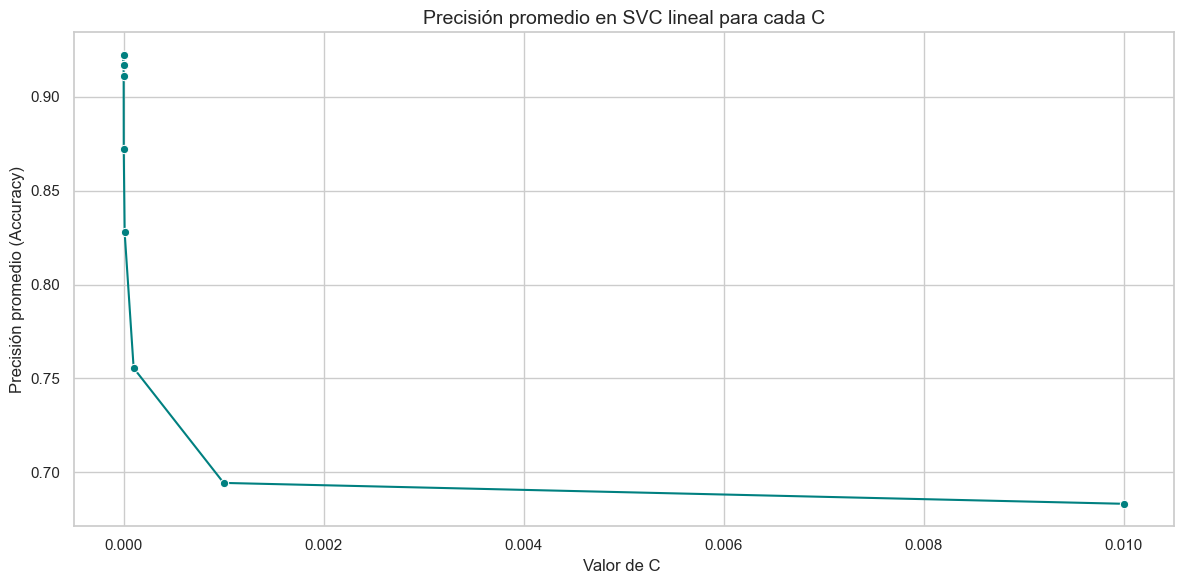

In [4]:
#----------- Gaussian Naive Bayes con hiper parametro var_smoothing

from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

data=np.loadtxt("../Class Scripts/activity_data.txt")
x=data[:,1:]
y=data[:,0]
kf1 = StratifiedKFold(n_splits=5, shuffle = True,random_state=45)


best_c = 1
best_acc = 0
Mean_test_score=[]
for c in [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]:
    acc_hyp_cv = []
    clf_cv_hyp = GaussianNB(var_smoothing=c)
 

    for train_index, test_index in kf1.split(x, y):
        x_train = x[train_index, :]
        y_train = y[train_index]
        x_test = x[test_index, :]
        y_test = y[test_index]
        clf_cv_hyp.fit(x_train,y_train)
        y_pred = clf_cv_hyp.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_hyp_cv.append(acc_i)
    
    acc_hyp = np.average(acc_hyp_cv)
    
    if (best_acc < acc_hyp):
        best_c = c
        best_acc = acc_hyp
    
    Mean_test_score.append( acc_hyp)

# Valores de C usados
k_values = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
accuracies = Mean_test_score

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Gráfica
sns.lineplot(x=k_values, y=accuracies, marker='o', color='teal')
 # Escala logarítmica en X



# Etiquetas y diseño
plt.title('Precisión promedio en SVC lineal para cada C', fontsize=14)
plt.xlabel('Valor de C ', fontsize=12)
plt.ylabel('Precisión promedio (Accuracy)', fontsize=12)
plt.tight_layout()
plt.show()

---- n features = 1
ACC: 0.7333333333333334
---- n features = 2
ACC: 0.8666666666666668
---- n features = 3
ACC: 0.9
---- n features = 4
ACC: 0.8722222222222223
---- n features = 5
ACC: 0.8833333333333334
---- n features = 6
ACC: 0.888888888888889
---- n features = 7
ACC: 0.8666666666666666
---- n features = 8
ACC: 0.8777777777777779
---- n features = 9
ACC: 0.8833333333333332
---- n features = 10
ACC: 0.8833333333333332
---- n features = 11
ACC: 0.8888888888888887
---- n features = 12
ACC: 0.8944444444444445
---- n features = 13
ACC: 0.8833333333333334
---- n features = 14
ACC: 0.888888888888889
---- n features = 15
ACC: 0.8833333333333334
---- n features = 16
ACC: 0.9222222222222222
---- n features = 17
ACC: 0.9111111111111111
---- n features = 18
ACC: 0.9222222222222222
---- n features = 19
ACC: 0.9111111111111111
---- n features = 20
ACC: 0.9277777777777778
---- n features = 21
ACC: 0.9222222222222222
---- n features = 22
ACC: 0.9333333333333332
---- n features = 23
ACC: 0.93333333

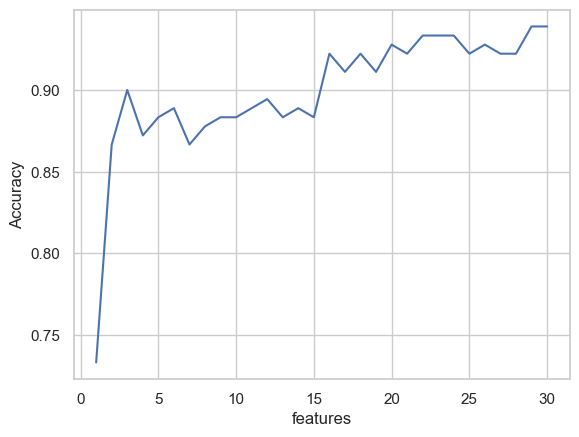

In [5]:
##### Opt features GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector, RFE, mutual_info_classif

data=np.loadtxt("../Class Scripts/activity_data.txt")
x=data[:,1:]
y=data[:,0]

n_feats = np.arange(1,31,1)
acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)
    
    for train_idx, test_idx in kf.split(x,y):
        x_train = x[train_idx,:]
        y_train = y[train_idx]
        
        clf_cv = GaussianNB()
        
        fselection_cv = SelectKBest(f_classif,k=n_feat)
        fselection_cv.fit(x_train,y_train)
        x_train = fselection_cv.transform(x_train)
        
        clf_cv.fit(x_train,y_train)
        
        x_test = fselection_cv.transform(x[test_idx, :])
        y_test = y[test_idx]
        y_pred = clf_cv.predict(x_test)
        
        acc_i = accuracy_score(y_test,y_pred)
        acc_cv.append(acc_i)
        
    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    
    print('ACC:', acc)
    
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

In [6]:
########## Evaluacion modelos Validacion Cruzada ##########

#--------- SVM Lineal

def Select_features(x,y,c):
    n_feats = np.arange(1,31,1)
    acc_nfeat = []

    for n_feat in n_feats:
       
        
        acc_cv = []

        kf = StratifiedKFold(n_splits=5, shuffle = True)
        
        for train_idx, test_idx in kf.split(x,y):
            x_train = x[train_idx,:]
            y_train = y[train_idx]
            
            clf_cv = SVC(C=c,kernel='linear')
            
            fselection_cv = SelectKBest(f_classif,k= n_feat)
            fselection_cv.fit(x_train,y_train)
            x_train = fselection_cv.transform(x_train)
            
            clf_cv.fit(x_train,y_train)
            
            x_test = fselection_cv.transform(x[test_idx, :])
            y_test = y[test_idx]
            y_pred = clf_cv.predict(x_test)
            
            acc_i = accuracy_score(y_test,y_pred)
            acc_cv.append(acc_i)
            
        acc = np.average(acc_cv)
        acc_nfeat.append(acc)
        
        
        
    opt_index = np.argmax(acc_nfeat)
    opt_features = n_feats[opt_index]
    return opt_features
    
kf1 = StratifiedKFold(n_splits=5, shuffle = True)
kf2 = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
acc=[]

for train_index, test_index in kf1.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test=x[test_index,:]
    y_test=y[test_index]
    
    best_c = 0
    best_acc = 0
    for c in np.arange(1e-1,2, 1e-1):
        acc_hyp_cv = []
        for sub_train_index, val_index in kf2.split(x_train, y_train):
            x_sub_train = x[sub_train_index, :]
            y_sub_train = y[sub_train_index]
            x_val = x[val_index, :]
            y_val = y[val_index]
            Opt_features=Select_features( x_sub_train,y_sub_train,c)
            clf_cv = SVC(C=c,kernel='linear')
            fselection_cv = SelectKBest(f_classif,k= Opt_features)
            fselection_cv.fit(x_sub_train,y_sub_train)
            x_sub_train = fselection_cv.transform(x_sub_train)
            clf_cv.fit(x_sub_train,y_sub_train)
            x_val=fselection_cv.transform(x_val)
            y_pred = clf_cv.predict(x_val)
            acc_i = accuracy_score(y_val, y_pred)
            acc_hyp_cv.append(acc_i)
        acc_hyp = np.average(acc_hyp_cv)
        if (best_acc < acc_hyp):
            best_c = c
            best_acc = acc_hyp
    best_features=0
    Opt_features=Select_features( x_train,y_train,best_c)
    clf_cv = SVC(C=best_c,kernel='linear')
    fselection_cv = SelectKBest(f_classif,k= Opt_features)
    fselection_cv.fit(x_train,y_train)
    x_train=fselection_cv.transform(x_train)
    clf_cv.fit(x_train,y_train)
    x_test=fselection_cv.transform(x_test)
    y_pred = clf_cv.predict(x_test)
    acc_f = accuracy_score(y_test, y_pred)
    acc.append(acc_f)

final_acc=np.average(acc)
print(final_acc)

0.8833333333333332


In [7]:
#------Gaussian Naive Bayes

def Select_features(x,y,c):
    n_feats = np.arange(1,31,1)
    acc_nfeat = []

    for n_feat in n_feats:
       
        
        acc_cv = []

        kf = StratifiedKFold(n_splits=5, shuffle = True)
        
        for train_idx, test_idx in kf.split(x,y):
            x_train = x[train_idx,:]
            y_train = y[train_idx]
            
            clf_cv = GaussianNB(var_smoothing=c)
            
            fselection_cv = SelectKBest(f_classif,k= n_feat)
            fselection_cv.fit(x_train,y_train)
            x_train = fselection_cv.transform(x_train)
            
            clf_cv.fit(x_train,y_train)
            
            x_test = fselection_cv.transform(x[test_idx, :])
            y_test = y[test_idx]
            y_pred = clf_cv.predict(x_test)
            
            acc_i = accuracy_score(y_test,y_pred)
            acc_cv.append(acc_i)
            
        acc = np.average(acc_cv)
        acc_nfeat.append(acc)
        
        
        
    opt_index = np.argmax(acc_nfeat)
    opt_features = n_feats[opt_index]
    return opt_features
    
kf1 = StratifiedKFold(n_splits=5, shuffle = True)
kf2 = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
acc=[]

for train_index, test_index in kf1.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test=x[test_index,:]
    y_test=y[test_index]
    
    best_c = 0
    best_acc = 0
    for c in [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]:
        acc_hyp_cv = []
        for sub_train_index, val_index in kf2.split(x_train, y_train):
            x_sub_train = x[sub_train_index, :]
            y_sub_train = y[sub_train_index]
            x_val = x[val_index, :]
            y_val = y[val_index]
            Opt_features=Select_features( x_sub_train,y_sub_train,c)
            clf_cv = GaussianNB(var_smoothing=c)
            fselection_cv = SelectKBest(f_classif,k= Opt_features)
            fselection_cv.fit(x_sub_train,y_sub_train)
            x_sub_train = fselection_cv.transform(x_sub_train)
            clf_cv.fit(x_sub_train,y_sub_train)
            x_val=fselection_cv.transform(x_val)
            y_pred = clf_cv.predict(x_val)
            acc_i = accuracy_score(y_val, y_pred)
            acc_hyp_cv.append(acc_i)
        acc_hyp = np.average(acc_hyp_cv)
        if (best_acc < acc_hyp):
            best_c = c
            best_acc = acc_hyp
    best_features=0
    Opt_features=Select_features( x_train,y_train,best_c)
    clf_cv = GaussianNB(var_smoothing=best_c)
    fselection_cv = SelectKBest(f_classif,k= Opt_features)
    fselection_cv.fit(x_train,y_train)
    x_train=fselection_cv.transform(x_train)
    clf_cv.fit(x_train,y_train)
    x_test=fselection_cv.transform(x_test)
    y_pred = clf_cv.predict(x_test)
    acc_f = accuracy_score(y_test, y_pred)
    acc.append(acc_f)

final_acc=np.average(acc)
print(final_acc)

0.9166666666666666
